In [1]:
# Import Libraries

import pandas as pd
from sklearn.cluster import KMeans
import pandas as pd

In [2]:
# Read the data

customer_df = pd.read_csv("Mall_Customers.csv")
customer_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Data Exploration
# Check for null values

customer_df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
# Observation: There are no null values in the data

Text(0, 0.5, 'Spending Score (1-100)')

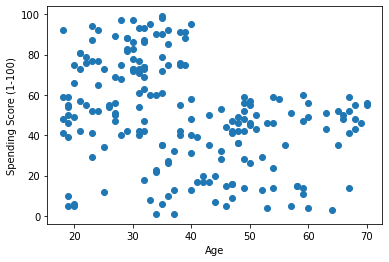

In [6]:
# Let's do some bivariate analysis involving variables age, Spending score AND Annual Income

import matplotlib.pyplot as plt
plt.scatter(customer_df["Age"], 
            customer_df["Spending Score (1-100)"])

plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")

Text(0, 0.5, 'Annual Income (k$)')

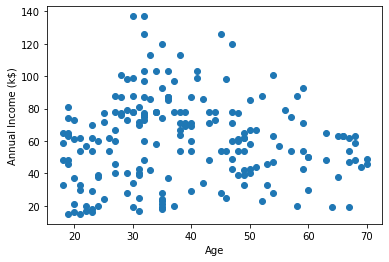

In [7]:
plt.scatter(customer_df["Age"], 
            customer_df["Annual Income (k$)"])

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")


Text(0, 0.5, 'Annual Income (k$)')

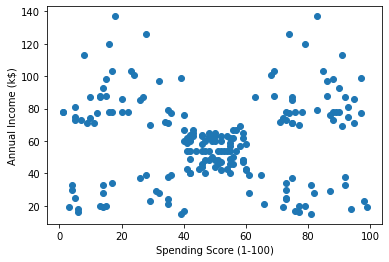

In [8]:
plt.scatter(customer_df["Spending Score (1-100)"], 
            customer_df["Annual Income (k$)"])

plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")

In [11]:
# Next we are going to choose relevant columns which will help us in  

relevant_cols = ["Age", "Annual Income (k$)", 
                 "Spending Score (1-100)"]

customer_df = customer_df[relevant_cols]

In [12]:
customer_df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [13]:
# Data Standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(customer_df)

scaled_data = scaler.transform(customer_df)

In [14]:
# Determine the best number of cluster


def find_best_clusters(df, maximum_K):
    
    clusters_centers = []
    k_values = []
    
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
        
    
    return clusters_centers, k_values


def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

In [15]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

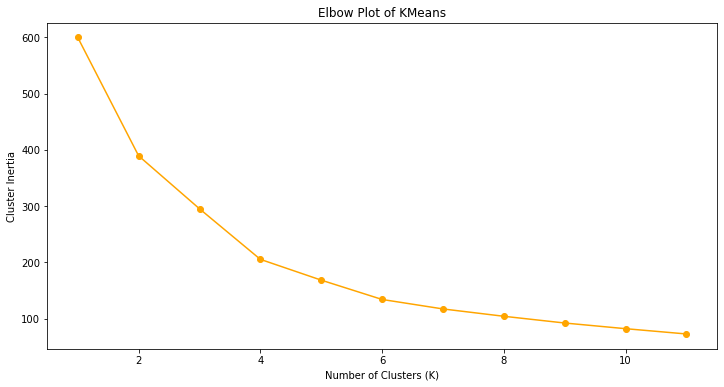

In [16]:
generate_elbow_plot(clusters_centers, k_values)

In [18]:
# Create the final KMeans model

kmeans_model = KMeans(n_clusters = 5)

kmeans_model.fit(scaled_data)

KMeans(n_clusters=5)

In [19]:
customer_df["clusters"] = kmeans_model.labels_

customer_df.head()

,Age,Annual Income (k$),Spending Score (1-100),clusters
0,19,15,39,1
1,21,15,81,1
2,20,16,6,4
3,23,16,77,1
4,31,17,40,1


Text(0, 0.5, 'Annual Income')

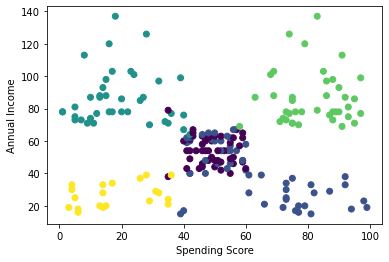

In [20]:
# Visualize the clusters

plt.scatter(customer_df["Spending Score (1-100)"], 
            customer_df["Annual Income (k$)"], 
            c = customer_df["clusters"])
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")


The KMeans clustering seems to generate a pretty good result, and the five clusters are well separated from each other, even though there is a slight overlap between the purple and the blue clusters.

The general observation is that :

Customers on the top left have a low spending score and a high annual income. A good marketing strategy could be implemented to target those customers so that they can spend more.

On the other hand, customers on the bottom left have a low annual income and also spends less, which makes sense, because they are trying to adjust their spending habit to their budget.

The top right customers are similar to the bottom left, the difference is that they have enough budget to spend.

Finally, the purple group of customers spends beyond their budget.
